# Background and rationale

# Importing and cleaning data
## population df import

In [77]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
pop_df = pd.read_csv('./data/PEP_2017_PEPAGESEX.csv', skiprows=1)

#isolate all the columns from the dataframe
pop_cols = pop_df.columns

#make a mask to pick out all the 'April estimate' values using regexes
april_mask = pop_cols.str.contains('April.*?estimate', case=False)

#subset out everything but all the April estimate values
noest = pop_cols[~april_mask]

#pick out all the old people using a regex and subset
old_mask = noest.str.contains('July.*?201[047].*?Both.*?[5-9][0-9] to|July.*?201[047].*?Both.*?Total.*?85 years and')
old_people_columns = noest[old_mask]
old_people_columns

#write a regex that pulls out all of the other stuff we need and subset
odd_mask = noest.str.contains('Geography|July.*?201[047].*?Both.*?Total$|July.*?201[047].*?both.*?median', case=False)
misc_columns = noest[odd_mask]

#convert to lists (so we can combine the series we made) and combine them into one data structure
req_cols = list(misc_columns) + list(old_people_columns)

#subset df by the data structure we created
subset_pop_df = pop_df.loc[:,req_cols]
subset_pop_df.shape

subset_pop_df.columns
new_col_lables = ['county', 'pop2010all', 'pop2014all', 'pop2017all', 'median_age_2010', 'median_age_2014', 'median_age_2017', 'pop2010_50to54','pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
    'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
    'pop2010_85over', 'pop2014_85over', 'pop2017_85over']

subset_pop_df.columns = new_col_lables
subset_pop_df.head()

,county,pop2010all,pop2014all,pop2017all,median_age_2010,median_age_2014,median_age_2017,pop2010_50to54,pop2014_50to54,pop2017_50to54,...,pop2017_70to74,pop2010_75to79,pop2014_75to79,pop2017_75to79,pop2010_80to84,pop2014_80to84,pop2017_80to84,pop2010_85over,pop2014_85over,pop2017_85over
0,"Anderson County, Tennessee",75112,75131,76257,42.6,43.3,43.2,5850,5690,5296,...,3765,2276,2327,2501,1969,1779,1785,2135,2211,2173
1,"Bedford County, Tennessee",45086,46259,48117,36.5,37.2,37.5,3043,3207,3239,...,1988,992,1156,1321,756,729,811,647,679,640
2,"Benton County, Tennessee",16511,16176,15986,45.6,46.7,47.4,1259,1204,1179,...,1075,562,681,717,414,399,418,362,409,415
3,"Bledsoe County, Tennessee",12882,14419,14717,42.5,43.3,43.9,1005,1216,1185,...,732,344,421,510,234,275,267,178,209,264
4,"Blount County, Tennessee",123213,125827,129929,41.5,43.1,43.8,9152,9658,9522,...,6808,3468,4074,4663,2550,2591,2939,2390,2656,2786


## import cancer data

In [79]:
#import cancer df, reformat columns
cancer_df = pd.read_csv('./data/cancer_deaths.csv', skiprows=4, skipfooter=14, engine='python')
cancer_df.head()

cancer_df_cols = ['county', 'fips', 'met_obj', 'deaths_per_100k', 'dr_ci_lower',
                 'dr_ci_upper', 'av_ann_count', 'recent_trend', '5_year_death_trend',
                 'trend_ci_lower', 'trend_ci_upper']
cancer_df.columns = cancer_df_cols
cancer_df.head()


,county,fips,met_obj,deaths_per_100k,dr_ci_lower,dr_ci_upper,av_ann_count,recent_trend,5_year_death_trend,trend_ci_lower,trend_ci_upper
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott County,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham County,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3


## import hospice data

In [80]:
hospice = pd.read_csv('./data/Hospice_General_Information.csv')

tn_hospice = hospice[hospice['State'] == 'TN']


tn_hospice = tn_hospice[['Facility Name', 'Address Line 1', 'City', 'State', 
                                     'County Name', 'CMS Region', 'Ownership Type', 'Certification Date']]

tn_hospice.columns = tn_hospice.columns.str.lower()
tn_hospice.head()

,facility name,address line 1,city,state,county name,cms region,ownership type,certification date
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2890,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",MEMPHIS,TN,Shelby,4,Non-Profit,08/31/1984
2891,HOSPICE OF CHATTANOOGA INC,4411 OAKWOOD DRIVE,CHATTANOOGA,TN,Hamilton,4,Non-Profit,06/30/1986
2892,AMEDISYS HOSPICE CARE,6570 STAGE ROAD SUITE 110,BARTLETT,TN,Shelby,4,For-Profit,02/09/1987
2893,NORTHCREST HOME HEALTH AND HOSPICE,212 NORTHCREST DRIVE,SPRINGFIELD,TN,Robertson,4,Other,07/13/1987


## merge data together

In [81]:
#reformat cancer_df's county coulmn to match hospices's country to merge
cancer_df = cancer_df.loc[cancer_df['county'].str.contains('County')]
cancer_df['county'] = cancer_df['county'].replace(to_replace=r'.County', value='', regex=True)

#reformat census data to match hospicses's county to merge
subset_pop_df['county'] = subset_pop_df['county'].replace(to_replace=r'.County.*?$', value='', regex=True)

#outer merge
pop_cancer_df = cancer_df.merge(subset_pop_df, how='outer', on='county')

#count hospices and add counties that lack hospices
hospice_counts = tn_hospice['county name'].value_counts().to_dict()

no_hospice_counties = {county:0 for county in pop_cancer_df['county'] if county not in hospice_counts.keys()}
hospice_counts.update(no_hospice_counties)

#convert to series and add to pop_cancer_df
s_hospice_counts = pd.Series(hospice_counts, name='county')
pop_cancer_hospice_df = pop_cancer_df.set_index('county')
pop_cancer_hospice_df['hospice_count'] = s_hospice_counts

#rename df for convinience going forward
pch_df = pop_cancer_hospice_df

## aggregation and analysis of different data

In [82]:
def find_percent_over_fifty(dataframe, regex_over_fifty, total_pop_col):
    '''
    finds the over 50 people per county in the passed df by the passed regexes
    
    implements regex across columns
    
    divides over fifty sum per county by total and calculates % over 50
    '''
    
    #find columns and sum
    pop_subset = dataframe.columns[dataframe.columns.str.contains(regex_over_fifty)]
    pop_sum_per_county = pch_df.loc[:,pop_subset].sum(axis=1)
    
    #divide and return
    percent_over_fifty = (pop_sum_per_county / dataframe[total_pop_col]) * 100
    
    return percent_over_fifty

#make new df to house percent data without pop over 50 data (i.e. delete rows we won't need again)
pch_pcts = pch_df.copy()
pch_pcts = pch_pcts.loc[:,~pch_pcts.columns.str.contains('pop201\d_')]

#add over fifty percentages
pch_pcts['percent_pop_over_50_2010'] = find_percent_over_fifty(pch_df, 'pop2010_', 'pop2010all')
pch_pcts['percent_pop_over_50_2014'] = find_percent_over_fifty(pch_df, 'pop2014_', 'pop2014all')
pch_pcts['percent_pop_over_50_2017'] = find_percent_over_fifty(pch_df, 'pop2017_', 'pop2017all')

#normalized hospice rate feature
pch_pcts['normalized_hospice_rate'] = (pch_pcts['hospice_count'] / pch_pcts['pop2017all']) * 100000
pch_pcts[['pop2017all','hospice_count', 'normalized_hospice_rate']].head()

,pop2017all,hospice_count,normalized_hospice_rate
county,,,
Trousdale,10083,0,0.000000
Scott,21989,0,0.000000
Cheatham,40330,0,0.000000
Claiborne,31609,1,3.163656
Hancock,6600,1,15.151515


## importing in additional TN data

In [83]:
#http://www.countyhealthrankings.org/app/tennessee/2018/rankings/outcomes/overall, year = 2017
chrr_tn = pd.read_excel(r'./data/2017_CountyHealthRankingsTennesseeData-v2.xls', sheet_name='Ranked Measure Data', skiprows=[0,2])
chrr_tn.head()

#subset by columns I think are interesting
chrr_tn = chrr_tn[['County', '% Fair/Poor', 
 'Mentally Unhealthy Days', '% Smokers', 
'% Obese', '% Physically Inactive', '% With Access', '% Excessive Drinking', 
'% Uninsured', 
'Preventable Hosp. Rate', 'Graduation Rate', '% Some College', '% Children in Poverty', 
'Association Rate', 
'Average Daily PM2.5', '% Severe Housing Problems', 
'% Long Commute - Drives Alone', 'Presence of violation']]

chrr_tn.columns = ['county', '% Fair/Poor health', 'Mentally Unhealthy Days', '% Smokers', 
'% Obese', '% Physically Inactive', '% With Access to exercise', '% Excessive Drinking', 
 '% Uninsured', 
'Preventable Hosp. Rate', 'Graduation Rate', '% Some College', '% Children in Poverty',  
 'Social Association Rate', 
'air pollution rate PM2.5', '% Severe Housing Problems', 
'% Long Commute - Drives Alone', 'drinking water violation']
chrr_tn = chrr_tn.set_index('county')

#subset cancer deaths df and merge with TN county data
cancer_deaths_interesting_columns = ['deaths_per_100k', 'percent_pop_over_50_2017']
pch_subset = pch_pcts[cancer_deaths_interesting_columns].copy()

pch_subset.sort_index(inplace=True)
chrr_tn.sort_index(inplace=True)

cancer_deaths_stats = pd.concat([chrr_tn, pch_subset], axis=1)

#fill in null values with median so seaborn/ML are happy
cancer_deaths_stats = cancer_deaths_stats.fillna(cancer_deaths_stats.median())
cancer_deaths_stats.isnull().sum()

% Fair/Poor health               0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
% Physically Inactive            0
% With Access to exercise        0
% Excessive Drinking             0
% Uninsured                      0
Preventable Hosp. Rate           0
Graduation Rate                  0
% Some College                   0
% Children in Poverty            0
Social Association Rate          0
air pollution rate PM2.5         0
% Severe Housing Problems        0
% Long Commute - Drives Alone    0
drinking water violation         0
deaths_per_100k                  0
percent_pop_over_50_2017         0
dtype: int64

In [84]:
#visualize quantitative data (i.e. barring categorical data)
quant_cancer = cancer_deaths_stats.loc[:, cancer_deaths_stats.columns != 'drinking water violation']
'''
g = sns.PairGrid(quant_cancer)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
'''
#plt.savefig('pairgrid_two.jpg')

'\ng = sns.PairGrid(quant_cancer)\ng.map_diag(plt.hist)\ng.map_offdiag(plt.scatter)\n'

# finding linear relationships among data

In [85]:
#subset based on columns that look linear w/r to cancer deaths
linear_columns_with_cancer_deaths = ['Mentally Unhealthy Days', '% Smokers', '% With Access to exercise', 
                                     '% Uninsured', '% Some College', '% Children in Poverty',
                                    '% Long Commute - Drives Alone', 'deaths_per_100k']
linear_cancer_deaths = cancer_deaths_stats[linear_columns_with_cancer_deaths]
linear_cancer_deaths.head()

#import libraries
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#subset into X and y, scale, and split
X_all = linear_cancer_deaths.iloc[:,:-1]
X_scaled = preprocessing.scale(X_all)

y_all = linear_cancer_deaths.iloc[:,-1].values

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


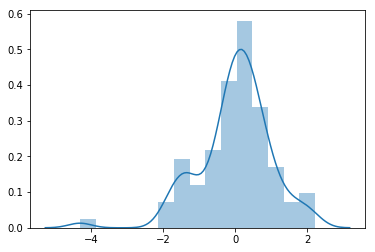

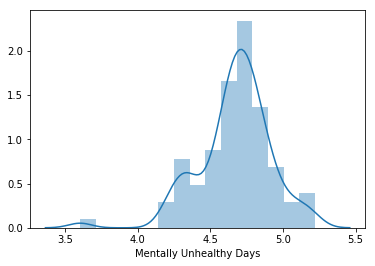

In [86]:
#make sure dist looks ok
sns.distplot(X_scaled[:,0])
plt.show()
sns.distplot(X_all.iloc[:,0])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E17ACE3C8>,
      dtype=object)

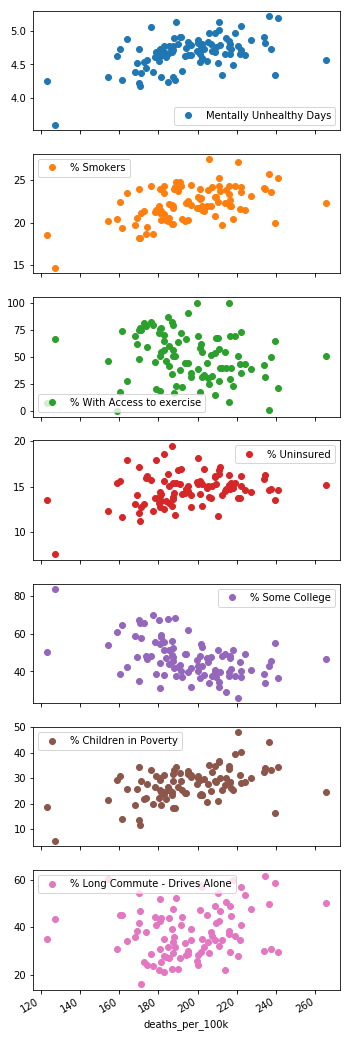

In [87]:
#plot data
linear_cancer_deaths.plot(y=linear_cancer_deaths.columns[:-1],
                          x=linear_cancer_deaths.columns[-1], 
                          kind = 'line', subplots = True, figsize = (5.5,20), ls="none", marker="o")

In [88]:
chrr_tn['% Excessive Drinking']

county
Anderson      11.959258
Bedford       11.906451
Benton        10.703938
Bledsoe       12.193462
Blount        12.550999
Bradley       12.353824
Campbell      11.405791
Cannon        12.150591
Carroll       11.794904
Carter        11.403398
Cheatham      13.183478
Chester       12.322766
Claiborne     12.200306
Clay          10.418236
Cocke         10.645328
Coffee        12.813520
Crockett      10.960606
Cumberland    10.799579
Davidson      13.641923
DeKalb        11.894312
Decatur       11.292001
Dickson       12.690819
Dyer          12.072853
Fayette       11.611215
Fentress      10.231859
Franklin      12.618338
Gibson        11.531789
Giles         11.613795
Grainger      11.648437
Greene        10.970445
                ...    
Obion         11.620930
Overton       11.376459
Perry         11.284147
Pickett       11.067751
Polk          11.590326
Putnam        13.163601
Rhea          11.730161
Roane         11.221350
Robertson     13.071481
Rutherford    14.377018
Scott    

## fitting multiple lines

In [89]:
#subset into X and y, scale, and split
X_all = linear_cancer_deaths.iloc[:,:-1].values
X_scaled = preprocessing.scale(X_all)

y_all = linear_cancer_deaths.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

#fit a linear model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients and intercepts
print('Coefficients: \n', regr.coef_)
print('Intercepts: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 4.62418992e+01  1.18404824e+00  1.09594394e-01 -1.83548453e+00
 -1.16167370e-02  6.87580999e-01  3.66823327e-01]
Intercepts: 
 -60.09230423794452
Mean squared error: 663.39
Variance score: -0.18


In [90]:
y_pred

array([180.11552756, 200.37874667, 195.44045153, 175.76439961,
       194.94162677, 198.61881593, 197.86112456, 172.32157227,
       178.84113004, 209.30242672, 189.73401226, 198.48582032,
       171.21091623, 215.52564766, 198.64930542, 175.15052193,
       167.93153658, 199.49605811, 193.92316099, 194.86139682,
       192.4991369 , 192.75572787, 177.37961441, 219.54544249])

In [91]:
X_test

array([[4.62220875e+00, 2.04336371e+01, 3.93933425e-02, 1.54693235e+01,
        6.09311741e+01, 2.93000000e+01, 3.06000000e+01],
       [4.77742519e+00, 2.34746700e+01, 5.62019043e+01, 1.25467148e+01,
        5.13046350e+01, 3.13000000e+01, 2.10000000e+01],
       [4.67040515e+00, 2.05775699e+01, 6.02886621e+01, 1.31674669e+01,
        5.13329755e+01, 2.52000000e+01, 4.37000000e+01],
       [4.31841925e+00, 1.98044257e+01, 7.89750011e+01, 1.38801316e+01,
        5.26837043e+01, 1.84000000e+01, 4.77000000e+01],
       [4.61874057e+00, 2.15109579e+01, 7.52731968e+01, 1.27933246e+01,
        5.46806699e+01, 3.00000000e+01, 3.06000000e+01],
       [4.80131068e+00, 2.19598369e+01, 5.44512207e+01, 1.28542033e+01,
        5.28701919e+01, 2.34000000e+01, 3.50000000e+01],
       [4.65986821e+00, 2.39681227e+01, 1.73228028e+01, 1.56538522e+01,
        3.63036834e+01, 2.93000000e+01, 5.78000000e+01],
       [4.34600218e+00, 1.97698514e+01, 3.98532744e+01, 1.40485049e+01,
        4.84633570e+01, 2

## fitting only one line

In [92]:
linear_cancer_deaths.head()

,Mentally Unhealthy Days,% Smokers,% With Access to exercise,% Uninsured,% Some College,% Children in Poverty,% Long Commute - Drives Alone,deaths_per_100k
county,,,,,,,,
Anderson,4.618741,21.510958,75.273197,12.793325,54.680670,30.0,30.6,180.6
Bedford,4.687872,24.269148,64.334857,18.592304,38.070236,24.7,34.9,182.7
Benton,4.906162,24.097953,42.761841,15.831389,38.618705,32.2,30.0,233.9
Bledsoe,4.725290,24.004902,48.353526,17.202128,34.693878,34.5,54.3,170.0
Blount,4.379293,19.780779,69.154540,13.087526,58.680019,19.3,35.9,168.2


Coefficients: 
 [2.13677837]
Intercepts: 
 135.11594403843452
Mean squared error: 731.95
Variance score: -0.30


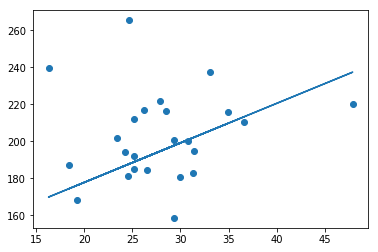

In [93]:
X_all = linear_cancer_deaths.loc[:,'% Children in Poverty'].values.reshape(-1, 1)
X_scaled = preprocessing.scale(X_all)

y_all = linear_cancer_deaths.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

#fit a linear model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients and intercepts
print('Coefficients: \n', regr.coef_)
print('Intercepts: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

# Focus on % children in poverty

In [101]:
#subset out columns that are linear w/r to %children in poverty
pct_poverty_cols = ['% Fair/Poor health', 'Mentally Unhealthy Days', '% Smokers', 
 '% Excessive Drinking','% Uninsured','% Some College', '% Children in Poverty']

#most linear subset
pct_poverty_cols = ['% Fair/Poor health', 'Mentally Unhealthy Days', '% Smokers','% Some College', '% Children in Poverty']
linear_poverty = chrr_tn[pct_poverty_cols]
linear_poverty.head()

,% Fair/Poor health,Mentally Unhealthy Days,% Smokers,% Some College,% Children in Poverty
county,,,,,
Anderson,20.026671,4.618741,21.510958,54.680670,30.0
Bedford,22.398967,4.687872,24.269148,38.070236,24.7
Benton,23.714235,4.906162,24.097953,38.618705,32.2
Bledsoe,22.291027,4.725290,24.004902,34.693878,34.5
Blount,18.410149,4.379293,19.780779,58.680019,19.3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E07859668>,
      dtype=object)

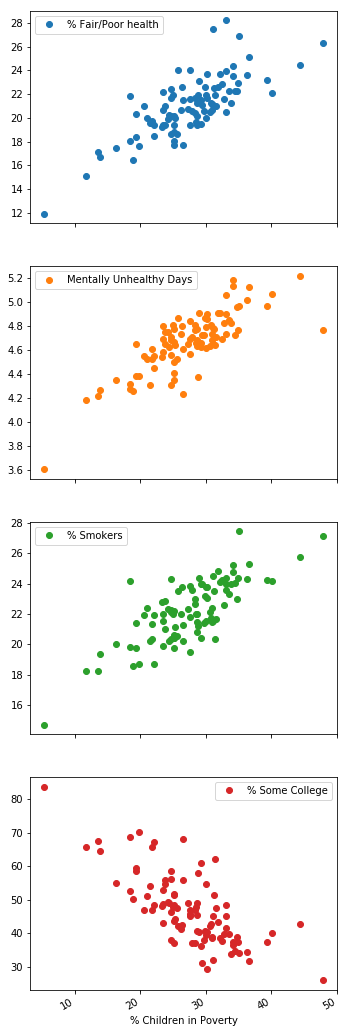

In [102]:
#plot data
linear_poverty.plot(y=linear_poverty.columns[:-1],
                          x=linear_poverty.columns[-1], 
                          kind = 'line', subplots = True, figsize = (5.5,20), ls="none", marker="o")

## fit a linear model to the data

In [103]:
X_all = linear_poverty.iloc[:,:-1].values
X_scaled = preprocessing.scale(X_all)

y_all = linear_poverty.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

#fit a linear model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients and intercepts
print('Coefficients: \n', regr.coef_)
print('Intercepts: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.25137496 14.24955508  0.0879132  -0.17247857]
Intercepts: 
 -38.773944850203726
Mean squared error: 24.99
Variance score: 0.38


In [97]:
#apply linear model to 2010 data
'''
come back to this later
'''

# Attempt to enter the forest

## Figuring out what variables to add to the model
I gotta figure out what variables to include in the model. To do this, I'm gonna do a pairplot, and use the hue to highlight whether or not the county had a drinking water violation.

The variables that clearly segregate drinking water violations against one another will be used in the analysis.

C:\Users\prael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\prael\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\prael\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


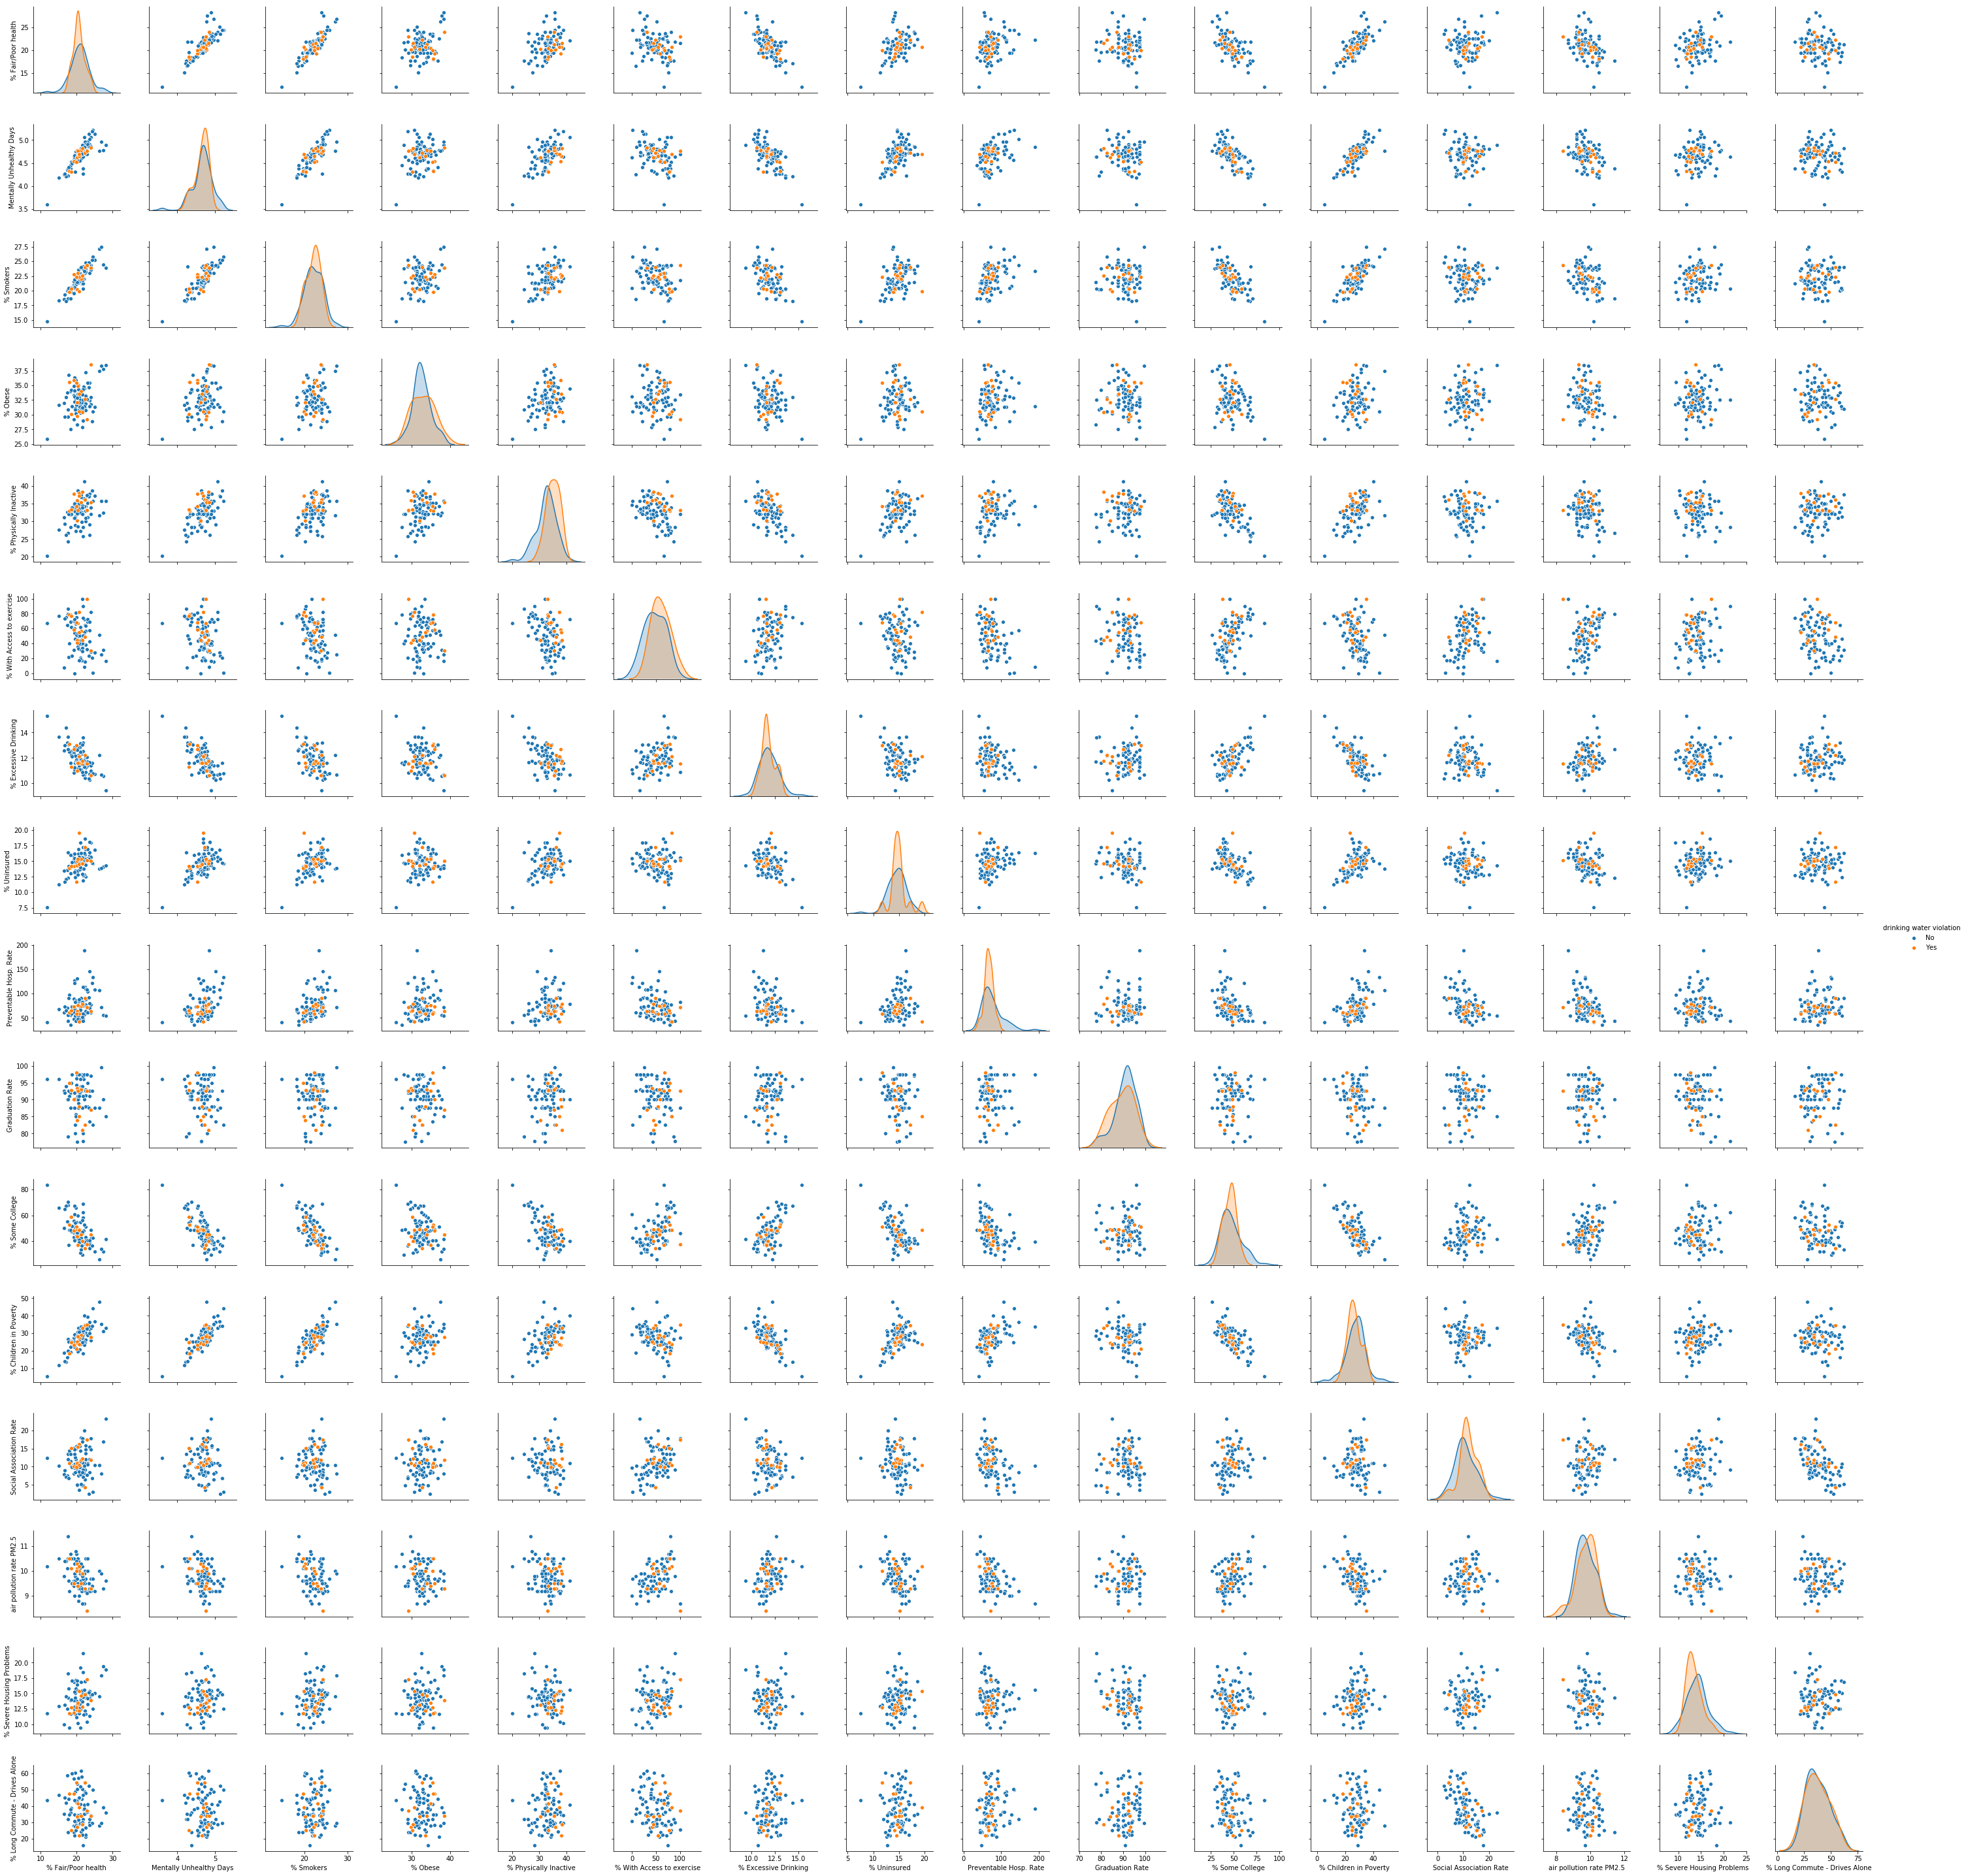

In [105]:
g = sns.pairplot(chrr_tn, hue='drinking water violation')
plt.savefig('drinking_water_pairplot.jpg')

this entry is continued in the 'PhorestPharmPham' notebook